In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def phi(t):
    return np.sin(t + np.pi/4)

def dphi(t):
    return np.cos(t + np.pi/4)

def y_exact(t, L, y0):
    return np.exp(-L*t)*(y0 - phi(0)) + phi(t)

In [3]:
# DIRK2
iters = 24
d = 5/iters
T = 10
gamma = 1 - 1/np.sqrt(2)
L = 1e4
y0 = np.sin(np.pi/4)
err_d2 = []
h_list = np.array([10**(-(1 + i*d)) for i in range(iters + 1)])

for i in range(iters + 1):
    h = h_list[i]
    N = int(T/h)
    u = np.zeros(N + 1)
    u[0] = y0
    t = np.linspace(0, T, N + 1)
    for n in range(N):
        k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
        k2 = (-L*(u[n] + h*(1 - gamma)*k1 - phi(t[n] + h)) + dphi(t[n] + h))/(1 + L*h*gamma)
        u[n + 1] = u[n] + h*((1 - gamma)*k1 + gamma*k2)
    err_d2.append(max(np.abs(u - y_exact(t, L, y0))))
    print("done iter", i)

done iter 0
done iter 1
done iter 2
done iter 3
done iter 4
done iter 5
done iter 6
done iter 7
done iter 8
done iter 9
done iter 10
done iter 11
done iter 12
done iter 13
done iter 14
done iter 15
done iter 16
done iter 17
done iter 18
done iter 19
done iter 20
done iter 21
done iter 22
done iter 23
done iter 24


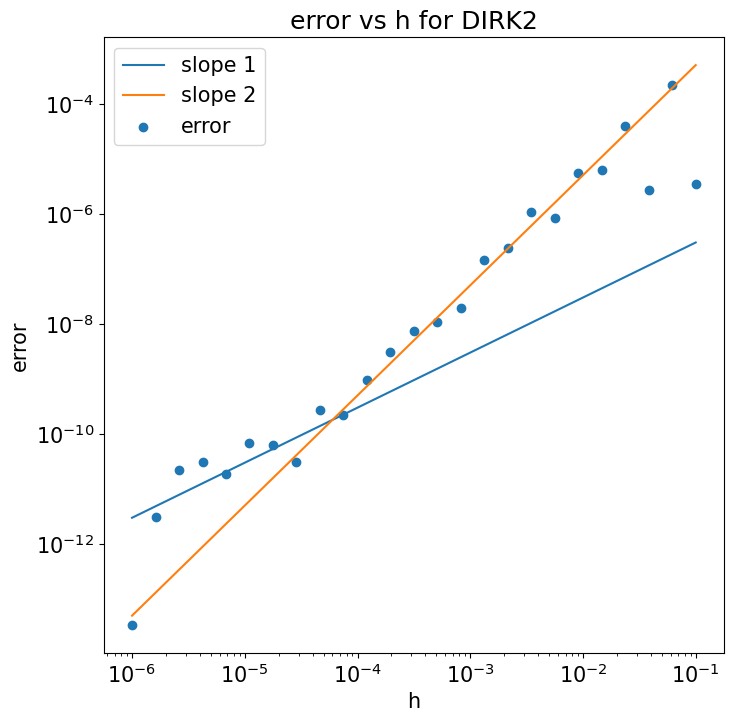

In [4]:
# plot DIRK2 error
c1, c2 = 3e-6, 5e-2
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(h_list, c1*h_list, label = "slope 1")
plt.plot(h_list, c2*h_list**2, label = "slope 2")
plt.scatter(h_list, err_d2, label = "error")
plt.title("error vs h for DIRK2")
plt.xlabel("h")
plt.ylabel("error")
plt.legend()
plt.savefig('hw3 dirk2 err.png')
plt.show()

In [5]:
# DIRK3
iters = 24
d = 5/iters
T = 10
gamma = 1/2 + np.sqrt(3)/6
L = 1e4
y0 = np.sin(np.pi/4)
err_d3 = []
h_list = np.array([10**(-(1 + i*d)) for i in range(iters + 1)])

for i in range(iters + 1):
    h = h_list[i]
    N = int(T/h)
    u = np.zeros(N + 1)
    u[0] = y0
    t = np.linspace(0, T, N + 1)
    for n in range(N):
        k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
        k2 = (-L*(u[n] + h*(1 - 2*gamma)*k1 - phi(t[n] + (1 - gamma)*h)) + dphi(t[n] + (1 - gamma)*h))/(1 + L*h*gamma)
        u[n + 1] = u[n] + h/2*(k1 + k2)
    err_d3.append(max(np.abs(u - y_exact(t, L, y0))))
    print("done iter", i)

done iter 0
done iter 1
done iter 2
done iter 3
done iter 4
done iter 5
done iter 6
done iter 7
done iter 8
done iter 9
done iter 10
done iter 11
done iter 12
done iter 13
done iter 14
done iter 15
done iter 16
done iter 17
done iter 18
done iter 19
done iter 20
done iter 21
done iter 22
done iter 23
done iter 24


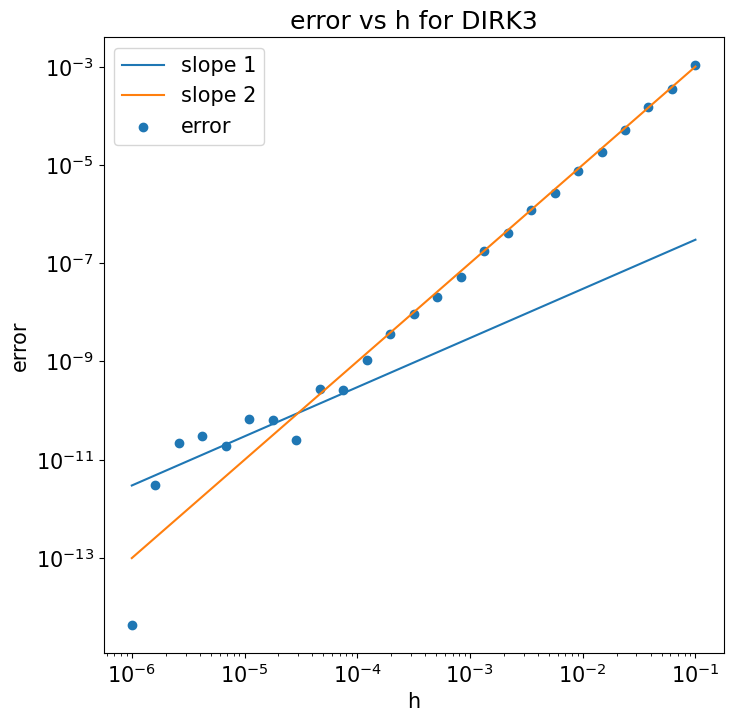

In [6]:
# plot DIRK3 error
c1, c2, c3 = 3e-6, 1e-1, 2
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot(h_list, c1*h_list, label = "slope 1")
plt.plot(h_list, c2*h_list**2, label = "slope 2")
plt.scatter(h_list, err_d3, label = "error")
plt.title("error vs h for DIRK3")
plt.xlabel("h")
plt.ylabel("error")
plt.legend()
plt.savefig('hw3 dirk3 err.png')
plt.show()

In [7]:
# DIRK2 with new initial condition
iters = 24
d = 5/iters
T = 10
gamma = 1 - 1/np.sqrt(2)
L = 1e4
y0 = np.sin(np.pi/4) + 10
err_d2_new = []
h_list = np.array([10**(-(1 + i*d)) for i in range(iters + 1)])

for i in range(iters + 1):
    h = h_list[i]
    N = int(T/h)
    u = np.zeros(N + 1)
    u[0] = y0
    t = np.linspace(0, T, N + 1)
    for n in range(N):
        k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
        k2 = (-L*(u[n] + h*(1 - gamma)*k1 - phi(t[n] + h)) + dphi(t[n] + h))/(1 + L*h*gamma)
        u[n + 1] = u[n] + h*((1 - gamma)*k1 + gamma*k2)
    err_d2_new.append(max(np.abs(u - y_exact(t, L, y0))))
    print("done iter", i)

done iter 0
done iter 1
done iter 2
done iter 3
done iter 4
done iter 5
done iter 6
done iter 7
done iter 8
done iter 9
done iter 10
done iter 11
done iter 12
done iter 13
done iter 14
done iter 15
done iter 16
done iter 17
done iter 18
done iter 19
done iter 20
done iter 21
done iter 22
done iter 23
done iter 24


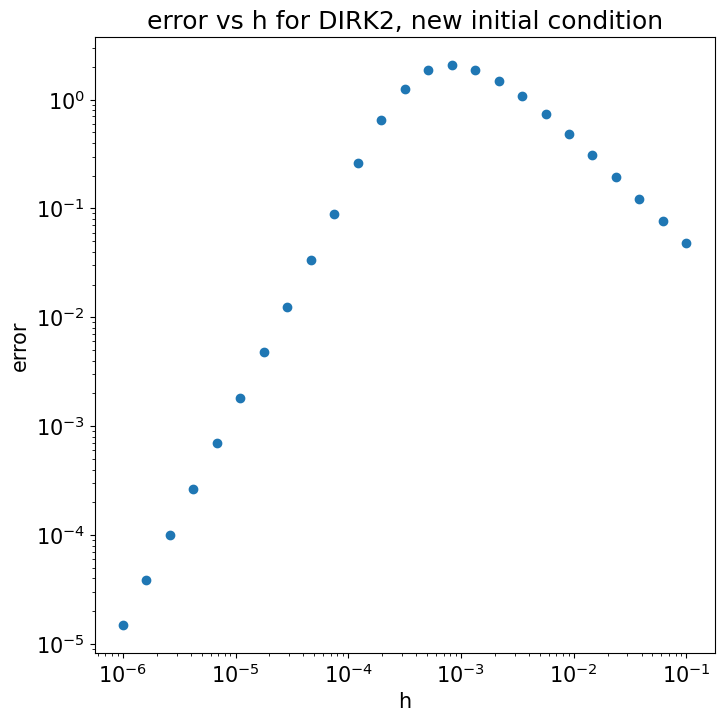

In [8]:
# plot DIRK2 error with new initial condition
c1, c2 = 3e-6, 5e-2
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(h_list, err_d2_new)
plt.title("error vs h for DIRK2, new initial condition")
plt.xlabel("h")
plt.ylabel("error")
plt.savefig('hw3 dirk2 err new ic.png')
plt.show()

In [9]:
# DIRK3 with new initial condition
iters = 24
d = 5/iters
T = 10
gamma = 1/2 + np.sqrt(3)/6
L = 1e4
y0 = np.sin(np.pi/4) + 10
err_d3_new = []
h_list = np.array([10**(-(1 + i*d)) for i in range(iters + 1)])

for i in range(iters + 1):
    h = h_list[i]
    N = int(T/h)
    u = np.zeros(N + 1)
    u[0] = y0
    t = np.linspace(0, T, N + 1)
    for n in range(N):
        k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
        k2 = (-L*(u[n] + h*(1 - 2*gamma)*k1 - phi(t[n] + (1 - gamma)*h)) + dphi(t[n] + (1 - gamma)*h))/(1 + L*h*gamma)
        u[n + 1] = u[n] + h/2*(k1 + k2)
    err_d3_new.append(max(np.abs(u - y_exact(t, L, y0))))
    print("done iter", i)

done iter 0
done iter 1
done iter 2
done iter 3
done iter 4
done iter 5
done iter 6
done iter 7
done iter 8
done iter 9
done iter 10
done iter 11
done iter 12
done iter 13
done iter 14
done iter 15
done iter 16
done iter 17
done iter 18
done iter 19
done iter 20
done iter 21
done iter 22
done iter 23
done iter 24


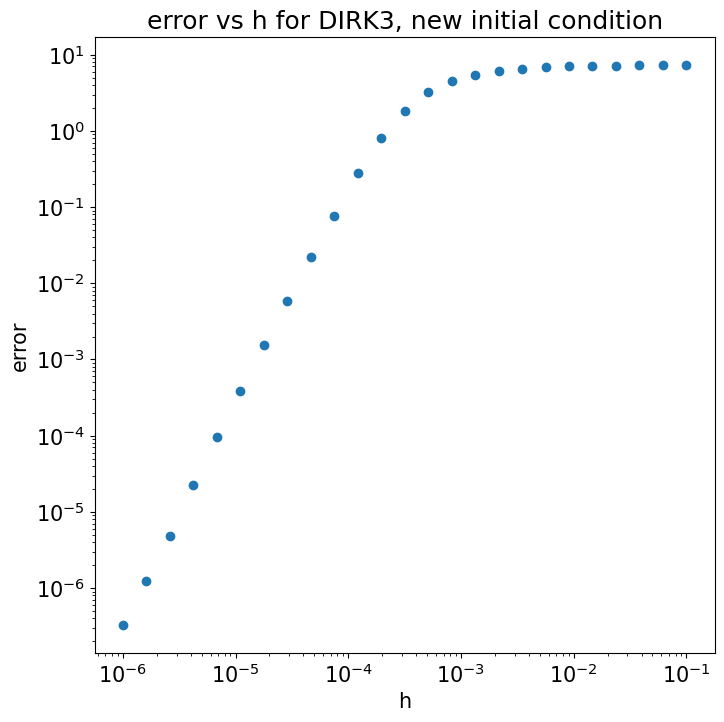

In [10]:
# plot DIRK3 error with new initial condition
c1, c2 = 3e-6, 1e-1
plt.rcParams.update({'font.size': 15})
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xscale('log')
ax.set_yscale('log')
plt.scatter(h_list, err_d3_new)
plt.title("error vs h for DIRK3, new initial condition")
plt.xlabel("h")
plt.ylabel("error")
plt.savefig('hw3 dirk3 err new ic.png')
plt.show()

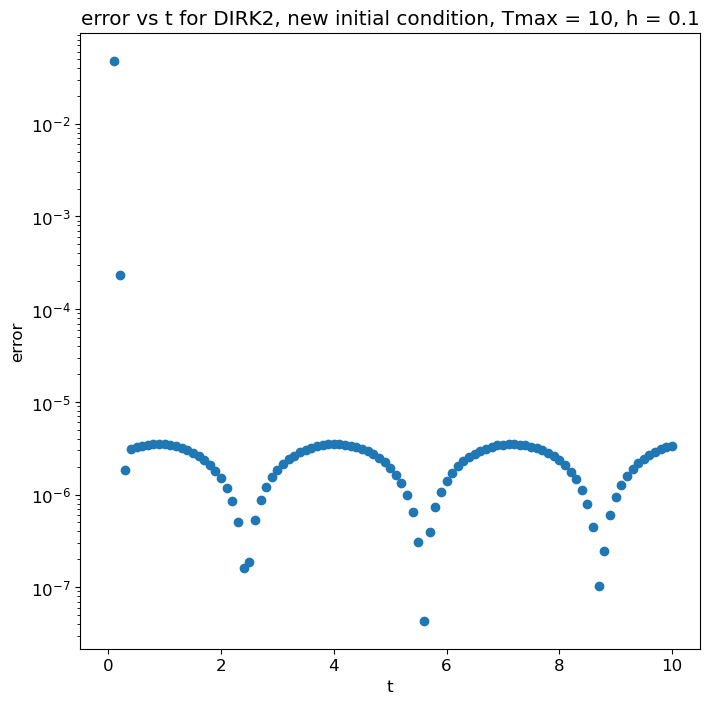

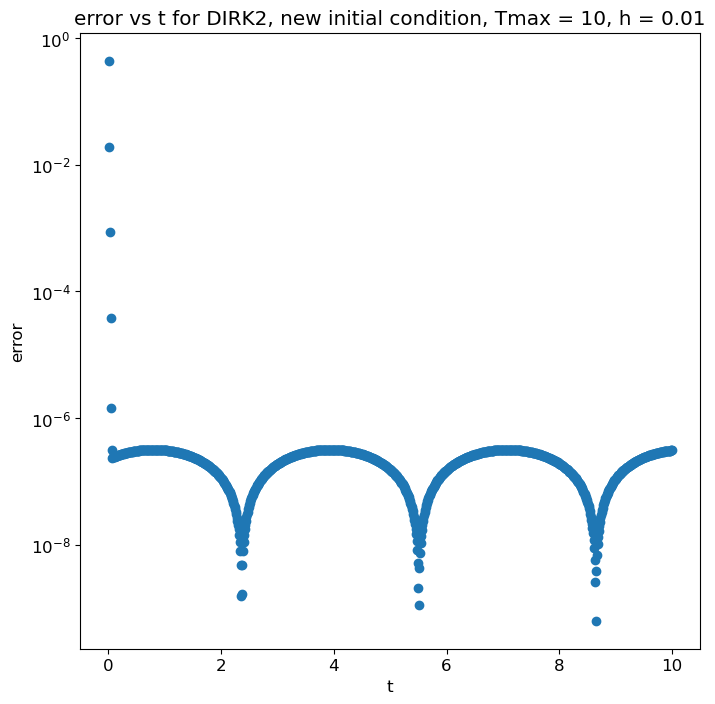

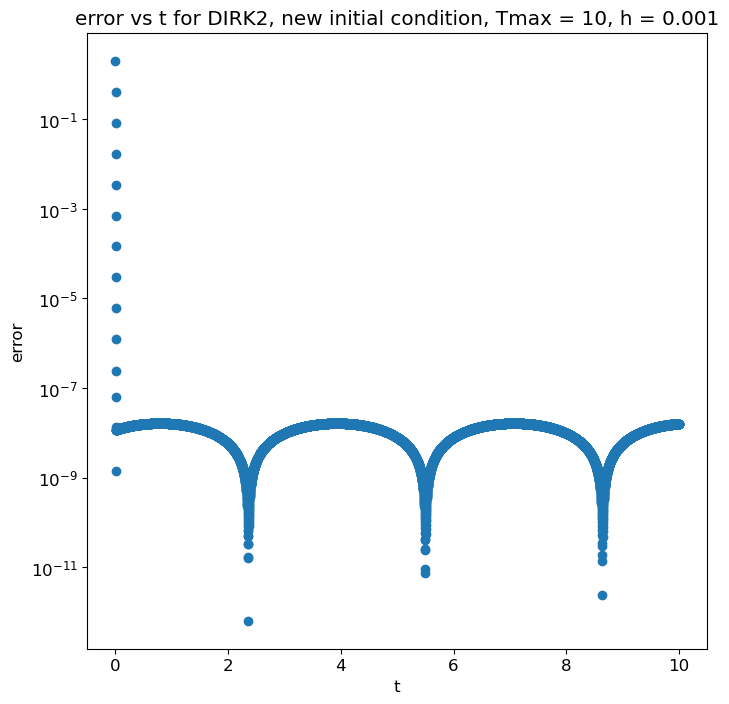

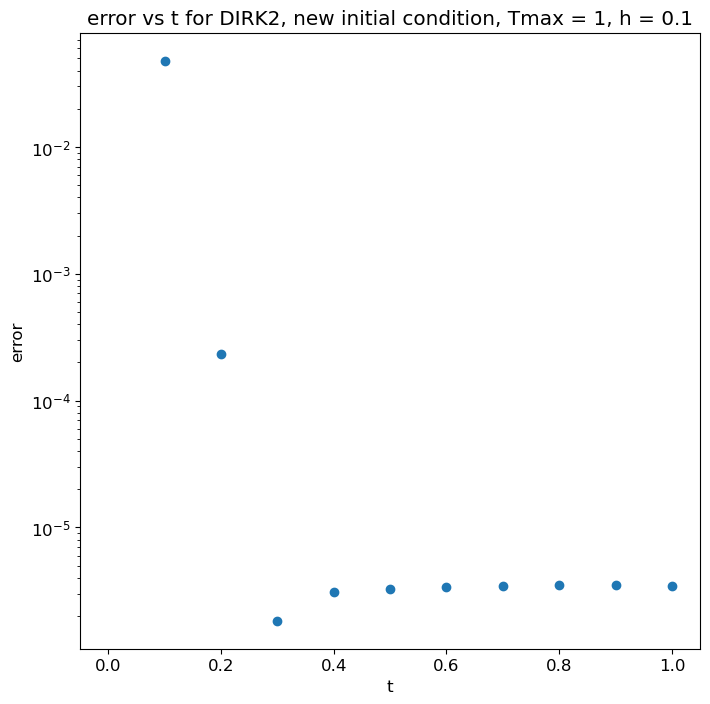

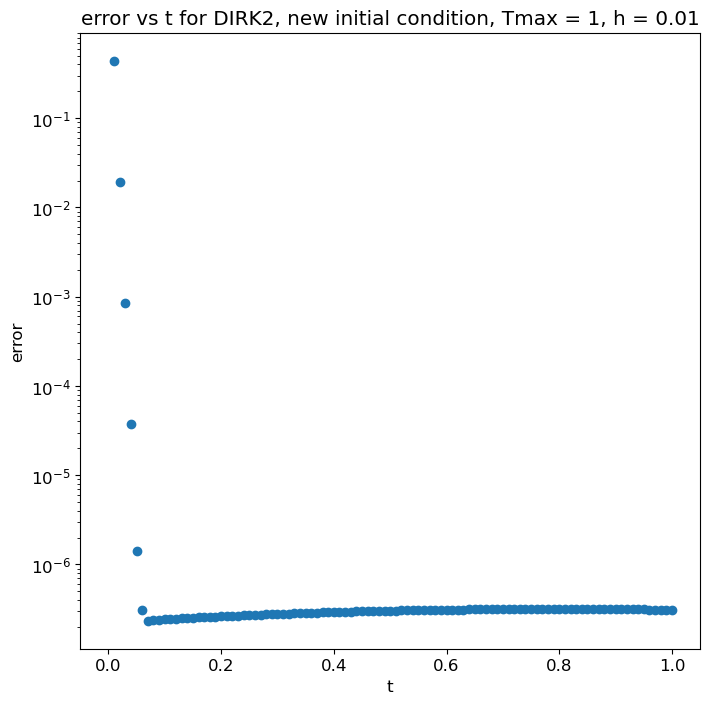

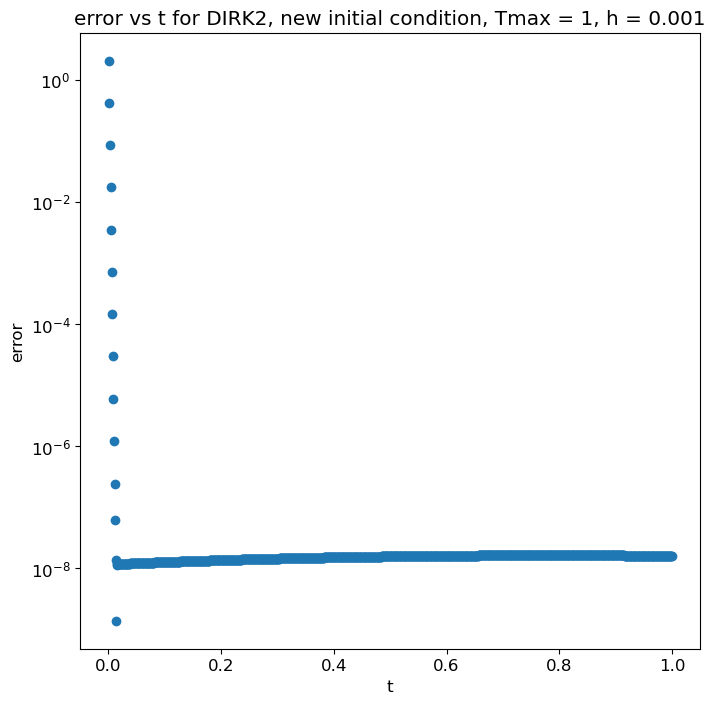

In [11]:
# DIRK2 with new initial condition, plot |error|
T = 10
gamma = 1 - 1/np.sqrt(2)
L = 1e4
y0 = np.sin(np.pi/4) + 10
i = 1
for T in [10, 1]:
    for h in np.array([1e-1, 1e-2, 1e-3]):
        N = int(T/h)
        u = np.zeros(N + 1)
        u[0] = y0
        t = np.linspace(0, T, N + 1)
        for n in range(N):
            k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
            k2 = (-L*(u[n] + h*(1 - gamma)*k1 - phi(t[n] + h)) + dphi(t[n] + h))/(1 + L*h*gamma)
            u[n + 1] = u[n] + h*((1 - gamma)*k1 + gamma*k2)
        plt.rcParams.update({'font.size': 12})
        fig, ax = plt.subplots(figsize=(8,8))
        plt.scatter(t, np.abs(u - y_exact(t, L, y0)))
        plt.xlabel("t")
        plt.ylabel("error")
        ax.set_yscale('log')
        plt.title("error vs t for DIRK2, new initial condition, Tmax = {}, h = {}".format(T, h))
        plt.savefig('hw3 dirk2 err vs t graph {}.png'.format(i))
        i += 1
        plt.show()

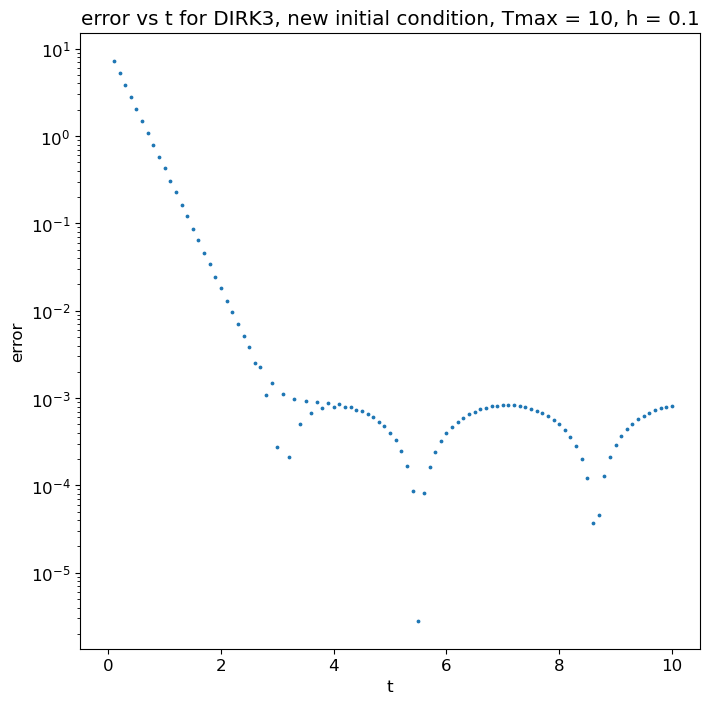

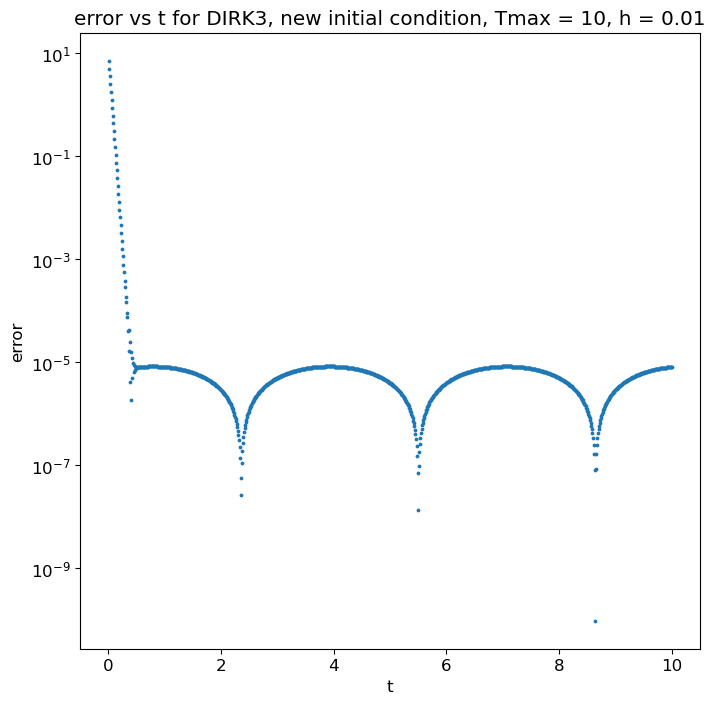

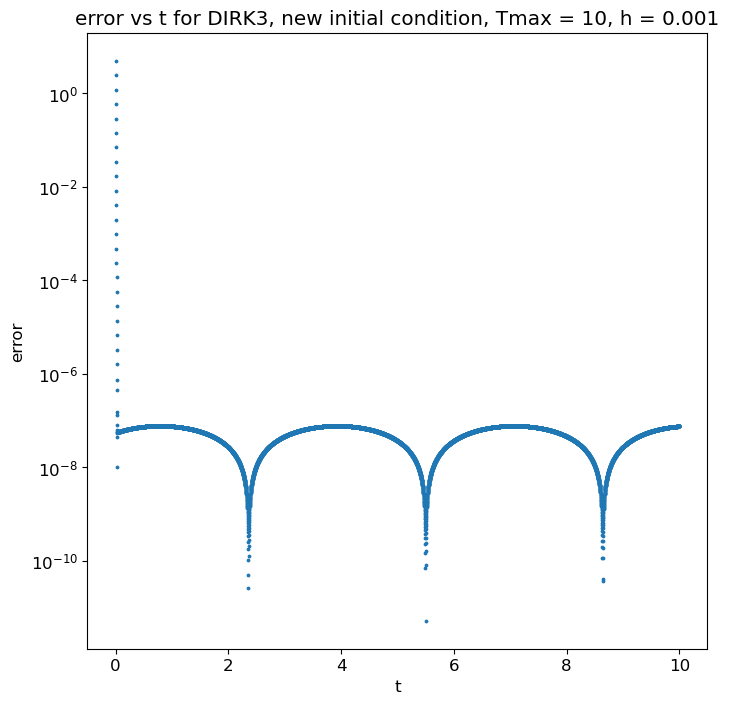

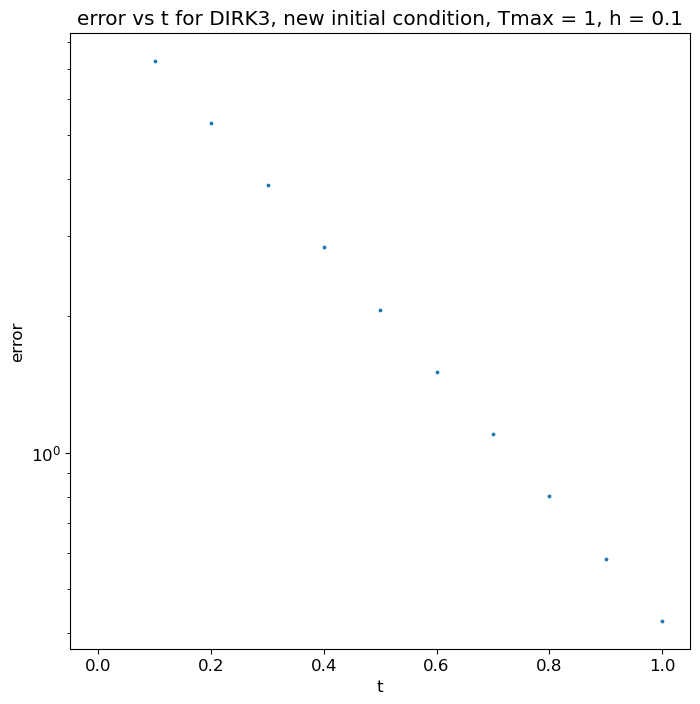

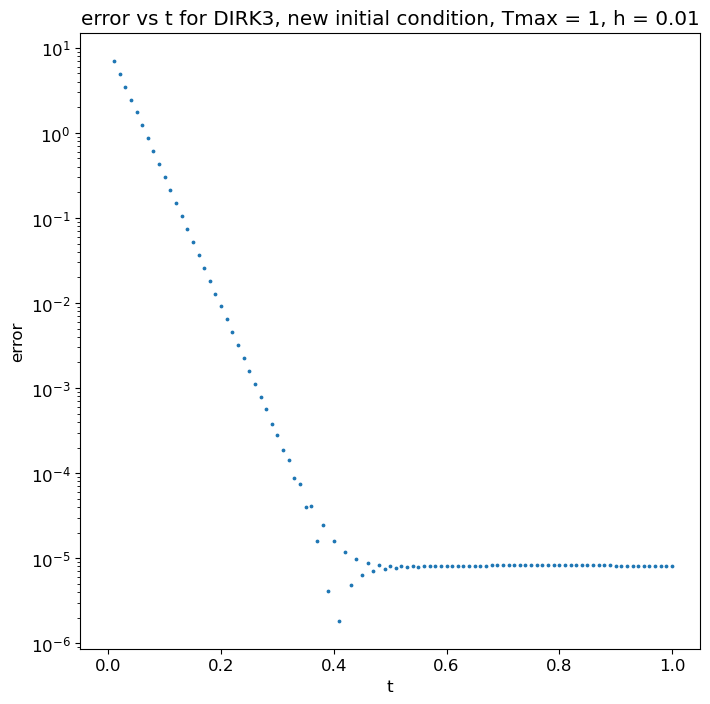

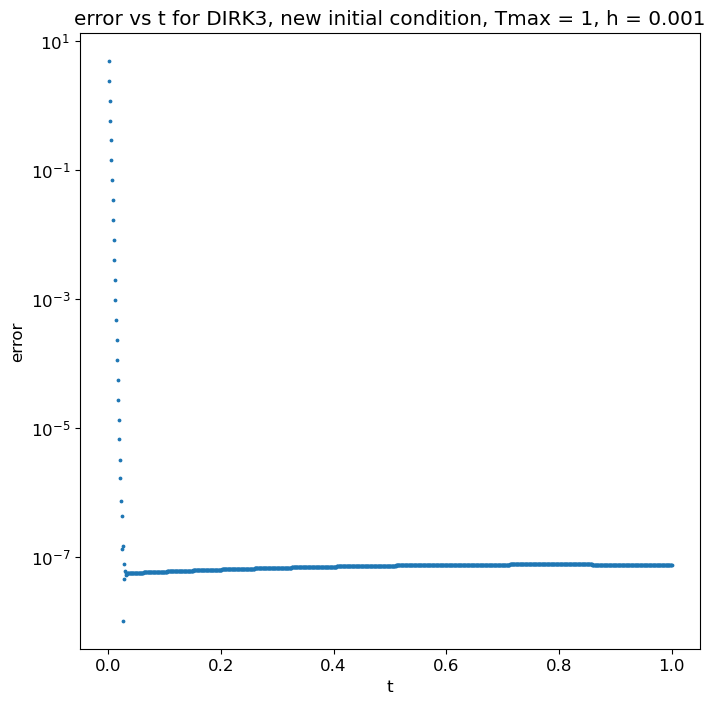

In [12]:
# DIRK3 with new initial condition, plot |error|
T = 10
gamma = 1/2 + np.sqrt(3)/6
L = 1e4
y0 = np.sin(np.pi/4) + 10
i = 1
for T in [10, 1]:
    for h in np.array([1e-1, 1e-2, 1e-3]):
        N = int(T/h)
        u = np.zeros(N + 1)
        u[0] = y0
        t = np.linspace(0, T, N + 1)
        for n in range(N):
            k1 = (-L*(u[n] - phi(t[n] + gamma*h)) + dphi(t[n] + gamma*h))/(1 + L*h*gamma)
            k2 = (-L*(u[n] + h*(1 - 2*gamma)*k1 - phi(t[n] + (1 - gamma)*h)) + dphi(t[n] + (1 - gamma)*h))/(1 + L*h*gamma)
            u[n + 1] = u[n] + h/2*(k1 + k2)
        plt.rcParams.update({'font.size': 12})
        fig, ax = plt.subplots(figsize=(8,8))
        plt.scatter(t, np.abs(u - y_exact(t, L, y0)), s=3)
        plt.xlabel("t")
        plt.ylabel("error")
        ax.set_yscale('log')
        plt.title("error vs t for DIRK3, new initial condition, Tmax = {}, h = {}".format(T, h))
        plt.savefig('hw3 dirk3 err vs t graph {}.png'.format(i))
        i += 1
        plt.show()